# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PART 1
# 1. IMPORTING DATA AND DATA CLEANING

In [2]:
# READ DATA 
df = pd.read_csv('county_census_population.csv', thousands=',')

# REMOVED SPACE IN COLUMN NAMES WITH UNDERSCORE
df.columns = [column.replace(" ", "_") for column in df.columns]


# REPLACING ABBREVIATED STATE NAMES
df = df.replace(to_replace=["OH","PA","FL","MD","NY","TX","VA","NC","WI"], value=["Ohio","Pennsylvania","Florida","Maryland","New York","Texas","Virginia","North Carolina","Wisconsin"])



# ADDING CUSTOM CALCULATED COLUMNS

In [3]:
# TOTAL POPULATION
df["total_population"] = df["female_total_population"] + df["male_total_population"]

# GENDER RATIO = NUMBER OF MALES FOR EVERY FEMALE
df["gender_ratio"] = (df["male_total_population"] / df["female_total_population"])

# KIDS UNDER 10
df["kids_under_10"] = df["female_age_under_5"] + df["female_age_5_to_9"] + df["male_age_under_5"] + df["male_age_5_to_9"]

# MALES UNDER 10
df["males_under_10"] = df["male_age_under_5"] + df["male_age_5_to_9"]

# FEMALES UNDER 10
df["females_under_10"] = df["female_age_under_5"] + df["female_age_5_to_9"]

# TEENAGERS
df["teenager_population"] = df["female_age_10_to_14"] + df["male_age_10_to_14"] + df["female_age_15_to_19"] + df["male_age_15_to_19"] 


# 2. STATEWISE SUMMARY STATISTICS FOR TOTAL POPULATION

In [4]:
# SUMMARY STATISTICS
df[["state","total_population"]].groupby("state").describe()

total_population                                        \
                                count          mean           std       min   
state                                                                         
Alabama                         126.0  1.702888e+05  1.419826e+05   65294.0   
Alaska                           18.0  1.641428e+05  9.740523e+04   89694.0   
Arizona                          60.0  6.440885e+05  1.153835e+06   71473.0   
Arkansas                         66.0  1.470322e+05  9.318391e+04   68668.0   
California                      243.0  9.514377e+05  1.651523e+06   63860.0   
Colorado                         67.0  3.962086e+05  1.841243e+05   65065.0   
Connecticut                      48.0  4.486376e+05  3.547740e+05  116632.0   
Delaware                         18.0  3.072802e+05  1.757421e+05  162912.0   
District of Columbia              6.0  6.393553e+05  2.575279e+04  604804.0   
Florida                         240.0  4.696950e+05  5.275287e+05   67355.0   
Georgia                         213.0  2.096077e+05  2.254995e+05   62500.0   
Hawaii                           24.0  3.493283e+05  3.737064e+05   67159.0   
Idaho                            36.0  1.708369e+05  1.175219e+05   77597.0   
Illinois                        138.0  4.789650e+05  1.040135e+06   66369.0   
Indiana                         150.0  1.870201e+05  1.812794e+05   67000.0   
Iowa                             60.0  1.560276e+05  1.066926e+05   66717.0   
Kansas                           48.0  2.173633e+05  1.894052e+05   65738.0   
Kentucky                         78.0  1.635299e+05  1.822902e+05   61764.0   
Louisiana                       102.0  1.953246e+05  1.162180e+05   73237.0   
Maine                            36.0  1.561491e+05  7.103640e+04   68560.0   
Maryland                         96.0  3.514179e+05  3.101152e+05   72563.0   
Massachusetts                    72.0  5.535720e+05  3.942128e+05   70670.0   
Michigan                        175.0  2.988126e+05  3.955573e+05   67116.0   
Minnesota                        81.0  2.813492e+05  2.906822e+05   65014.0   
Mississippi                      60.0  1.302942e+05  5.670416e+04   67802.0   
Missouri                        102.0  2.396525e+05  2.448948e+05   65422.0   
Montana                          33.0  1.030404e+05  2.701793e+04   65370.0   
Nebraska                         18.0  3.324910e+05  1.565609e+05  159789.0   
Nevada                           12.0  1.228162e+06  8.311214e+05  423163.0   
New Hampshire                    36.0  1.899267e+05  1.217083e+05   75874.0   
New Jersey                      126.0  4.228912e+05  2.522601e+05   64215.0   
New Mexico                       58.0  1.678128e+05  1.791396e+05   64362.0   
New York                        234.0  4.763971e+05  6.286785e+05   64586.0   
North Carolina                  240.0  1.967597e+05  1.991845e+05   65944.0   
North Dakota                     21.0  1.001429e+05  3.987987e+04   66565.0   
Ohio                            229.0  2.526571e+05  2.802784e+05   65420.0   
Oklahoma                         66.0  2.127790e+05  2.325196e+05   69699.0   
Oregon                           90.0  2.313925e+05  2.015859e+05   64819.0   
Pennsylvania                    240.0  2.945818e+05  3.081568e+05   63960.0   
Puerto Rico                      66.0  1.411199e+05  8.607858e+04   69623.0   
Rhode Island                     24.0  2.508424e+05  2.251398e+05   82040.0   
South Carolina                  126.0  1.905897e+05  1.160917e+05   66223.0   
South Dakota                     12.0  1.413096e+05  3.794769e+04  101500.0   
Tennessee                       120.0  2.198242e+05  2.199769e+05   66436.0   
Texas                           317.0  4.319525e+05  7.257259e+05   64587.0   
Utah                             36.0  4.064350e+05  3.335306e+05  113418.0   
Vermont                           6.0  1.589948e+05  1.664741e+03  156866.0   
Virginia                        180.0  1.959596e+05  2.035323e+05   629

# CONTINUED DATA ANALYSIS

In [5]:
# COUNTY WITH THE HIGHEST GENDER RATIO WITH RESPECTIVE YEARS

df[['state','county_name','year','gender_ratio']].sort_values(by=['gender_ratio','year'], ascending= False)[:10]

,state,county_name,year,gender_ratio
2362,Texas,Walker County,2012,1.639291
4660,Texas,Walker County,2015,1.590679
715,Texas,Walker County,2010,1.483847
2723,Texas,Walker County,2013,1.476005
1021,Texas,Walker County,2011,1.413335
4018,Texas,Walker County,2014,1.383501
1255,California,Kings County,2011,1.319635
2124,California,Kings County,2012,1.257376
182,California,Kings County,2010,1.255919
2906,California,Kings County,2013,1.254705


In [6]:
# COUNTY WITH THE HIGHEST TEENAGE POPULATION AFTER LOS ANGELES

df[['state','county_name','year','teenager_population']].sort_values(by=['teenager_population','year'], ascending= False)[6:]

,state,county_name,year,teenager_population
323,Illinois,Cook County,2010,695777
1397,Illinois,Cook County,2011,692583
2267,Illinois,Cook County,2012,678948
3049,Illinois,Cook County,2013,664481
3879,Illinois,Cook County,2014,651973
...,...,...,...,...
2999,Florida,Sumter County,2013,5705
275,Florida,Sumter County,2010,5265
3829,Florida,Sumter County,2014,5093
2217,Florida,Sumter County,2012,5071


In [7]:
# COUNTY WITH HIGHEST KIDS POPULATION

df[['county_name','year','kids_under_10']].sort_values(['year','kids_under_10'], ascending= False)[:15]

,county_name,year,kids_under_10
4309,Los Angeles County,2015,1260510
4632,Harris County,2015,703325
4175,Cook County,2015,658912
4281,Maricopa County,2015,562530
4322,San Diego County,2015,419055
4325,San Diego County,2015,419055
4622,Dallas County,2015,395582
4317,Orange County,2015,389694
4842,Kings County,2015,366265
4319,Riverside County,2015,328136


In [8]:
# YEAR 2015 ANALYSIS - LATEST DATA

data_2015 = df[ (df.year == 2015)]



## Top 5 populated counties of 2015

In [9]:
# TOP 5 POPULATED COUNTIES OF 2015
data_2015[['county_name','state','total_population']].sort_values(['total_population'], ascending= False)[:5]

,county_name,state,total_population
4309,Los Angeles County,California,10165283
4175,Cook County,Illinois,5238374
4632,Harris County,Texas,4544824
4281,Maricopa County,Arizona,4176283
4325,San Diego County,California,3296237


## Least 5 populated counties of 2015

In [10]:
# LEAST 5 POPULATED COUNTIES
data_2015[['county_name','total_population']].sort_values(['total_population'], ascending= True)[:5]

,county_name,total_population
4250,Pike County,61764
4152,Liberty County,62500
4468,Carbon County,63960
4816,Salem County,64215
4826,Otero County,64362


## State wise total population and gender ratio of 2015

In [11]:
#STATE WISE TOTAL POPULATION AND GENDER RATIO- 2015

data_2015[["state","total_population","gender_ratio"]].groupby('state').sum().sort_values(by='total_population', ascending=False)

,total_population,gender_ratio
state,,
California,43519721,42.963416
Texas,23956948,52.349005
Florida,19564003,38.408253
New York,18790322,38.097055
Pennsylvania,11831444,38.932970
Illinois,11037588,22.241598
Michigan,10215471,29.121040
Ohio,9753508,38.006716
New Jersey,8956887,20.207300


In [12]:
# COUNTY WITH LOWEST KIDS POPULATION

data_2015[['county_name','state','year','kids_under_10']].sort_values(['year','kids_under_10'], ascending= True)

,county_name,state,year,kids_under_10
4125,Sumter County,Florida,2015,4278
4918,Athens County,Ohio,2015,4909
4878,Carteret County,North Carolina,2015,5653
4472,Columbia County,Pennsylvania,2015,5674
4702,Franklin County,Massachusetts,2015,5780
...,...,...,...,...
4325,San Diego County,California,2015,419055
4281,Maricopa County,Arizona,2015,562530
4175,Cook County,Illinois,2015,658912
4632,Harris County,Texas,2015,703325


## Male and female population in different states - 2015

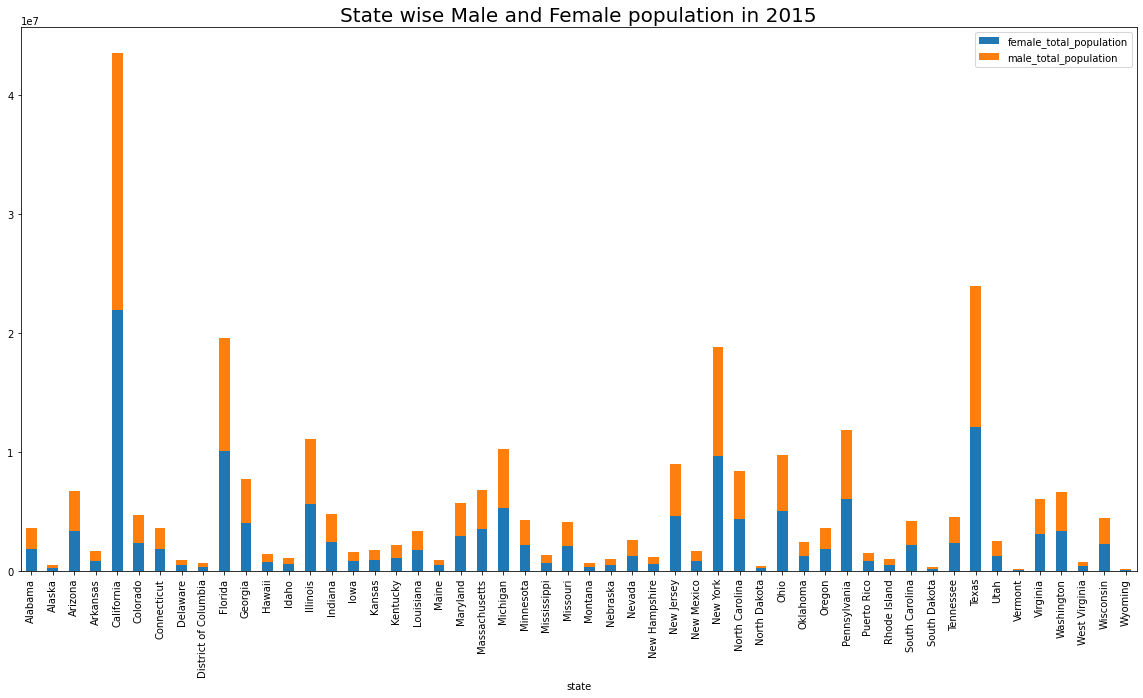

In [13]:

#PLOTTING THE TOTAL POPULATION AS STACKED BARS (MALE / FEMALE)
data_2015[['state','female_total_population','male_total_population']].groupby('state').sum().plot(kind='bar', stacked = True, figsize= (20,10))
plt.title('State wise Male and Female population in 2015', size = 20)
plt.show()


# 3. CHOOSE 5 COUNTIES TO ANALYZE

## CHOOSING THE FOLLOWING 5 COUNTIES AND REASONS BEHIND IT
## 1. Los Angeles County (California) - Most populated county
## 2. Walker County (Texas)           - Highest gender ratio
## 3. Greene County (Ohio)            - I live here so I was curious :)
## 4. Cook County (Illinois)          - Highest teenager population after Los Angeles County
## 5. Sumter County (Florida)         - Lowest kids population in 2015


# LOS ANGELES COUNTY (CALIFORNIA) ANALYSIS

In [14]:
los_angeles_county = df[df.county_name == 'Los Angeles County']

## Population trends based on gender 2010 - 2015

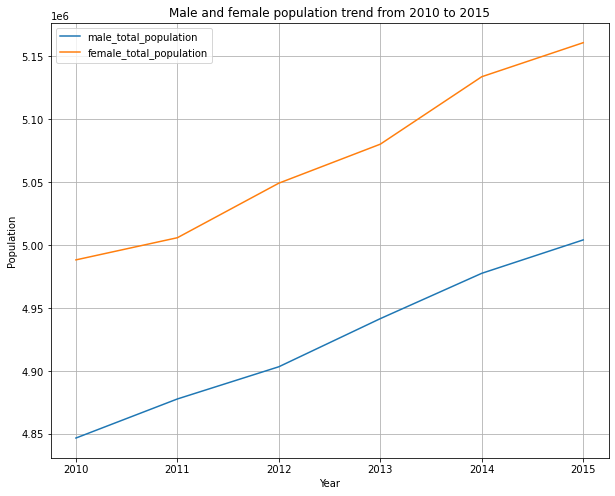

In [15]:
los_angeles_county.plot.line('year',['male_total_population','female_total_population'], figsize = (10,8), grid = True)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Male and female population trend from 2010 to 2015')
plt.show()

## Correlation matrix for Los Angeles county

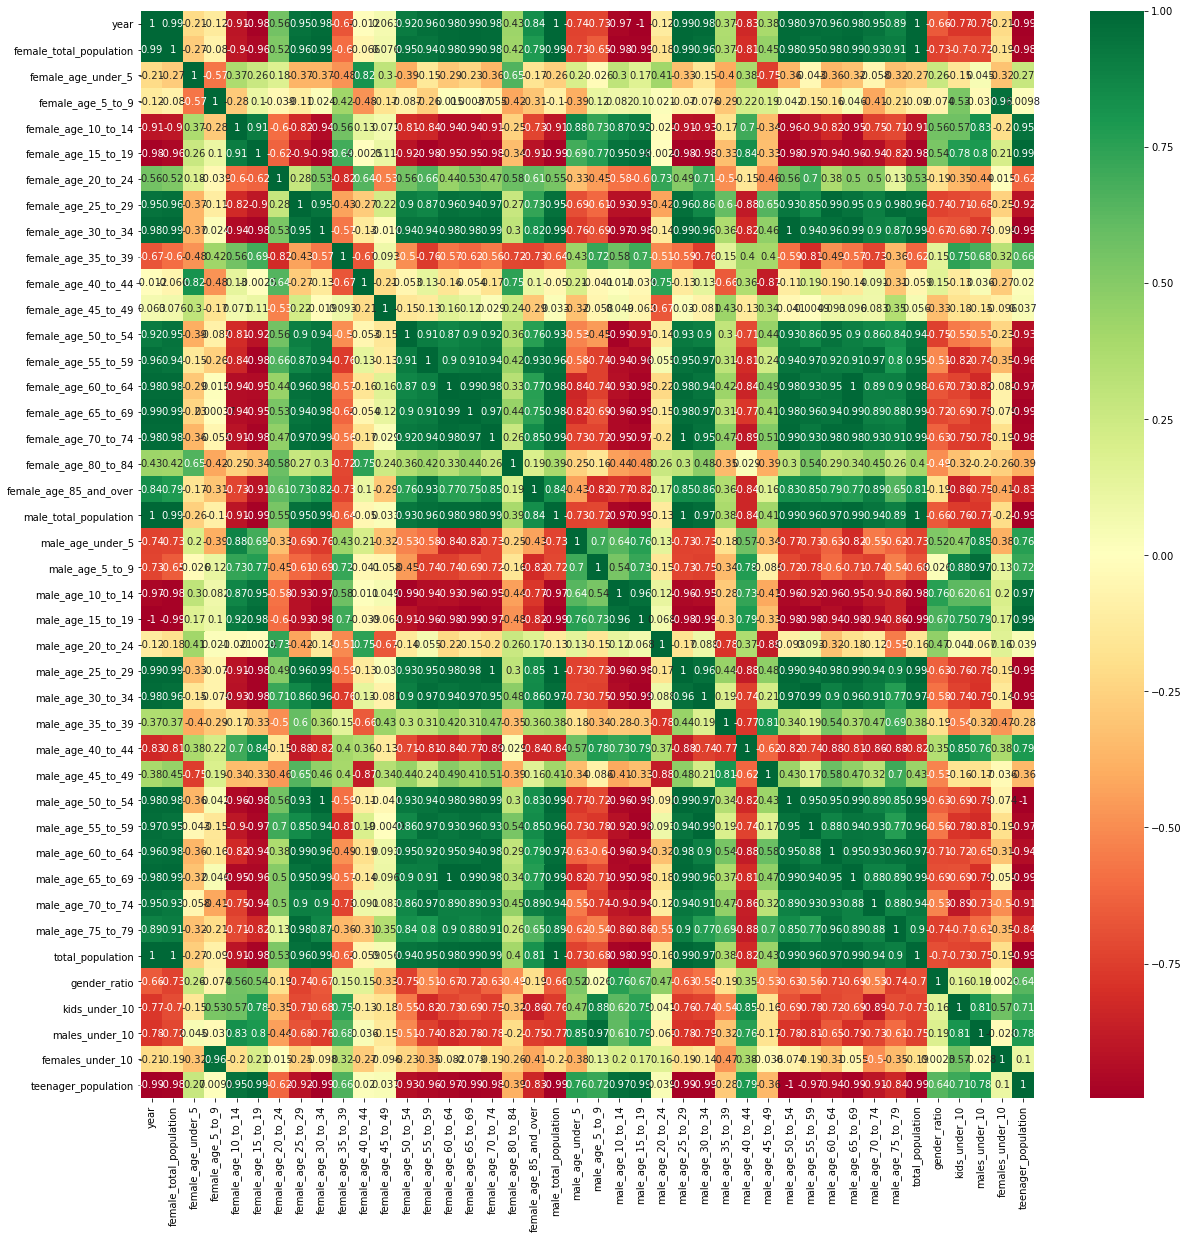

In [16]:
plt.subplots(figsize=(20,20))
sns.heatmap(los_angeles_county.corr(), annot=True, cmap='RdYlGn')
plt.show()


## INTERESTING CASE OF DECREASE AND THEN INCREASE OF FEMALE POPULATION AGED 35 - 39

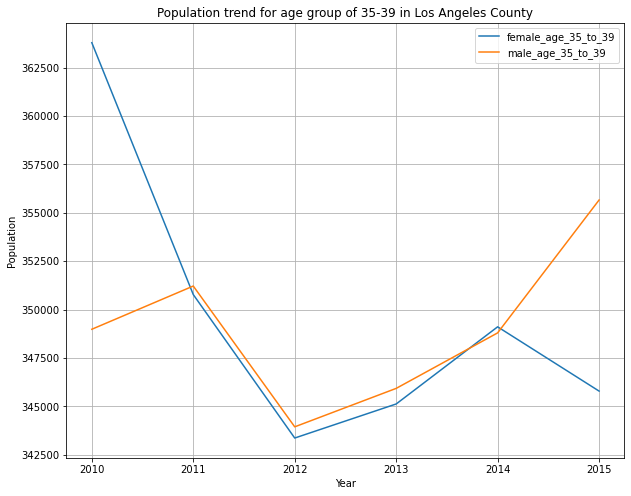

In [17]:
los_angeles_county.plot.line('year',['female_age_35_to_39','male_age_35_to_39'], figsize = (10,8), grid = True)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population trend for age group of 35-39 in Los Angeles County')
plt.show()

# WALKER COUNTY (TEXAS) ANALYSIS - HIGHEST GENDER RATIO

In [18]:
texas_walker_county = df[(df.county_name == "Walker County") & (df.state == "Texas")]
texas_walker_county[['year','male_total_population','female_total_population','gender_ratio']].sort_values(['gender_ratio','year'], ascending=False)


,year,male_total_population,female_total_population,gender_ratio
2362,2012,42515,25935,1.639291
4660,2015,43416,27294,1.590679
715,2010,40742,27457,1.483847
2723,2013,40999,27777,1.476005
1021,2011,39914,28241,1.413335
4018,2014,40502,29275,1.383501


Text(0.5, 1.0, 'Fluctuation in gender ratio from 2010 - 2015')

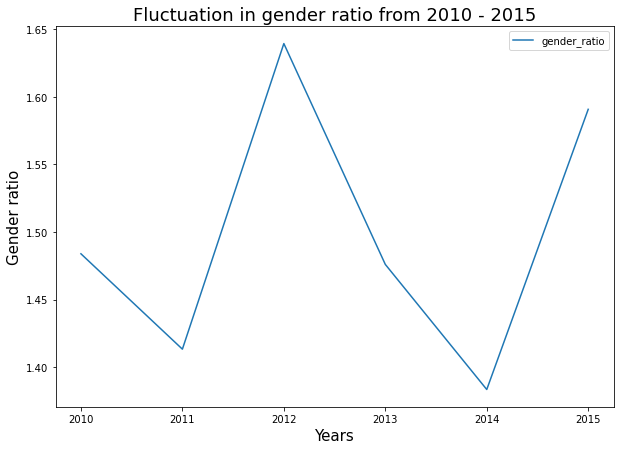

In [19]:
texas_walker_county.plot.line('year','gender_ratio', figsize = (10,7))
plt.xlabel("Years", size=15)
plt.ylabel("Gender ratio", size = 15)
plt.title("Fluctuation in gender ratio from 2010 - 2015", size = 18)

# GREENE COUNTY (OHIO) ANALYSIS
## INTERESTING INCREASE IN FEMALE POPULATION AND DECREASE IN MALE POPULATION IN YEAR 2013

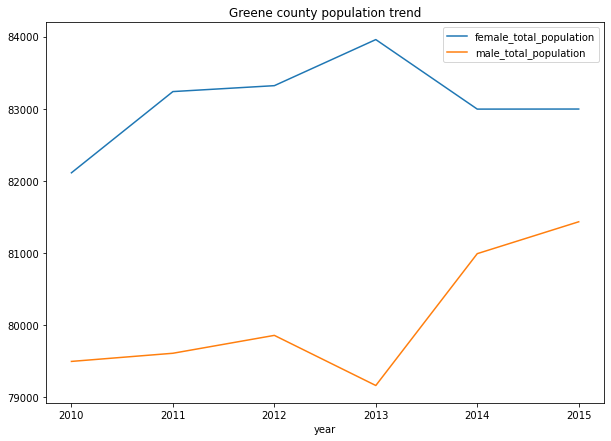

In [20]:
greene_county = df[ (df.county_name == "Greene County") & (df.state == "Ohio")]
greene_county.plot.line('year', ['female_total_population','male_total_population'], figsize = (10,7))
plt.title('Greene county population trend')
plt.show()

# COOK COUNTY (ILLINOIS) - HIGHEST TEENAGER POPULATION AFTER LOS ANGELES COUNTY

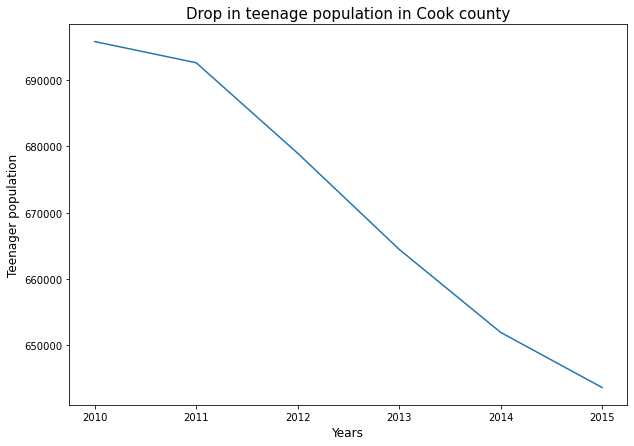

In [21]:
cook_county = df[(df.county_name == 'Cook County')]

plt.subplots(figsize=(10,7))
sns.lineplot(x=cook_county['year'], y=cook_county['teenager_population'])
plt.title("Drop in teenage population in Cook county", size=15)
plt.xlabel("Years", size = 12)
plt.ylabel("Teenager population", size = 12)
plt.show()

# SUMTER COUNTY (FLORIDA) - LOWEST KIDS POPULATION IN 2015

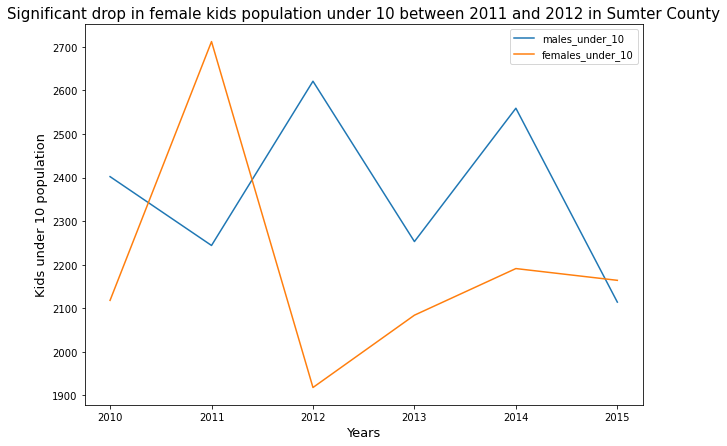

In [22]:
sumter_county = df[(df.county_name == 'Sumter County') & (df.state == 'Florida')]
sumter_county.plot.line('year',['males_under_10','females_under_10'], figsize = (10,7))
plt.title("Significant drop in female kids population under 10 between 2011 and 2012 in Sumter County", size = 15)
plt.xlabel("Years", size = 13)
plt.ylabel("Kids under 10 population", size = 13)
plt.show()